In [5]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq import least_busy
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-12-02 15:02:21,517: Credentials are already in use. The existing account in the session will be replaced.


In [6]:
def dj_oracle(case,n):
    
    oracle_qc=QuantumCircuit(n+1)
    
    if case=="balanced":
        for qubit in range(n):
            #creates an oracle that gives a balanced function
            #we apply a cnot gate having as control the first n qubits
            oracle_qc.cx(qubit,n) 
            #if we have an even number of 1s we will get the output 0  
            #taking the parity of the input bitstring
    if case=="constant":
        output=np.random.randint(2)
        if output ==1:
            oracle_qc.x(n) #flip ancilla qubit
    
    oracle_gate=oracle_qc.to_gate()
    oracle_gate.name="Oracle"
    return oracle_gate
    
            
            
            

In [7]:
def dj_algorithm(n, case="random"):
    dj_circuit=QuantumCircuit(n+1,n)#n classical bits to store measurment outcomes
    #set up the input register
    for qubit in range(n):
        dj_circuit.h(qubit)
    #set up the output qubit (minus state)
    dj_circuit.x(n)
    dj_circuit.h(n)
    
    #add the oracle gate to our circuit
    if case == "random":
        random=np.random.randint(2)
        if random==0:
            case="constant"
        else:
            case="balanced"
    oracle=dj_oracle(case,n)
    dj_circuit.append(oracle,range(n+1))
    #merform h gates
    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i,i)#qubit measured and the classical bit on which it will be stored
    return dj_circuit    

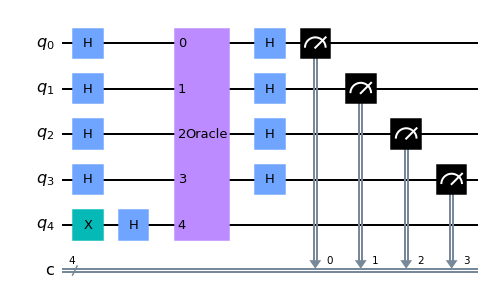

In [8]:
n=4
dj_circuit=dj_algorithm(n)
dj_circuit.draw()

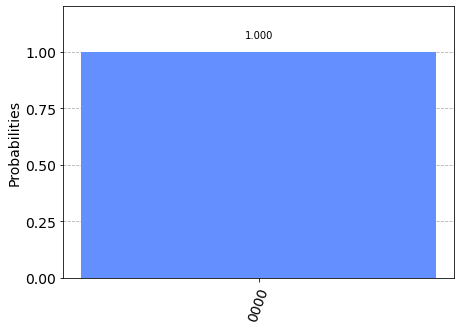

In [9]:
backend=Aer.get_backend('qasm_simulator')
shots=1024
dj_circuit=dj_algorithm(n,"constant")
results=execute(dj_circuit, backend=backend, shots=shots).result()
answer=results.get_counts()

plot_histogram(answer)

                    

In [9]:
backend=least_busy(provider.backends(filters= lambda x :x.configuration().n_qubits >= (n+1) and 
                                     not x.configuration().simulator 
                                     and x.status().operational==True))
print("least busy backend",backend)
%qiskit_job_watcher
dj_circuit=dj_algorithm(n)
job=execute(dj_circuit, backend=backend, shots=shots , optimization_level=3)


least busy backend ibmq_bogota


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

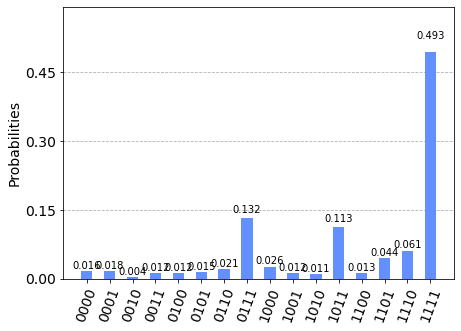

In [10]:
results=job.result()
answer=results.get_counts()
plot_histogram(answer)